<a href="https://colab.research.google.com/github/erlonbie/Deep-Learning-teste/blob/main/Ocean_deeplearning_13_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas

from tensorflow import keras # Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

Carregar os dados

In [ ]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Analisar Dataset

In [ ]:
print("Quantidade de imagens para treino: ", len(x_treino))
print("Quantidade de imagens para teste: ", len(x_teste))
print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]
representacao_primeira_imagem = y_treino[0]
print("O que a imagem 0 de treino representa: ", representacao_primeira_imagem)
print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))

print(primeira_imagem)

Quantidade de imagens para treino:  60000
Quantidade de imagens para teste:  10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 de treino representa:  5
Formato da primeira imagem: (28, 28) <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 

A imagem representa:  7


TypeError: ignored

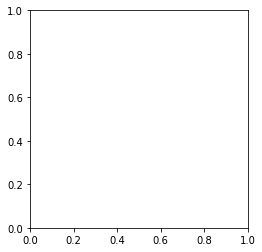

In [15]:
import matplotlib.pyplot as plt
indice = 12000
print("A imagem representa: ", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)


1.   Organizar camada de entraada
2.   Organizar a camada de saída
3.   Estruturar rede neural
4.   Treinar modelo
5.   Fazer previsões





In [12]:
#Achatando matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) #60000
quantidade_teste = len(x_teste) #10000

resolucao_imagem = x_treino[0].shape # (28,28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

print("Quantidade de itens em x_treino[0:", len(x_treino))

print(x_treino[0])

Quantidade de itens em x_treino[0: 60000
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

In [ ]:
#Normalizar dados

#255 vira 1
#127 vira 0.5
#0 vira 0

#Dividir pelo valor máximo (255)

#Converter float64 para float32 (Por conta da divisão uint8 por um int)
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))
print(x_treino[0])


In [17]:
#Prepara camada de saída
#Possibilidades de saída: 0 à 9 -> [0, 0, 0, 0, 0, 0, 0, 1] (9 por exemplo)

print("Primeiro elemento: ", y_treino[0], type(y_treino))
valores_unicos = set(y_treino)
print("Valores únicos:", valores_unicos)
quantidade_valores_unicos = len(valores_unicos)
print("y_treino[0] antes: ", y_treino[0])
y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)
print("y_treino[0] depois: ", y_treino[0])

Primeiro elemento:  5 <class 'numpy.ndarray'>
Valores únicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_treino[0] antes:  5
y_treino[0] depois:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Modelo Rede Neural - Sequential

In [18]:
model = Sequential()

#Primeiro hidden layer
#30 neurôniso
#função de ativação
#input shape 

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

#Adicionar regularizador -> ajuda a evitar overfitting
model.add(Dropout(0.2))

#Segundo hidden layer
#20 neurônios
#função de ativação: ReLU

model.add(Dense(20, activation='relu'))

#Mais um regularizador (entre primeira e segunda)

model.add(Dropout(0.2))

#Camada de saída
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

#Exibir resumo do modelo

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compilar treino do modelo
#Definir função de erro
#Definir otimizador
#Definir métrica de aprendizado

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

#Treina o modelo
#imagens em treino, labels em treino
#imagens em testes, labels em teste

history = model.fit(x_treino, y_treino, batch_size=128, epochs=10, verbose=1, validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 2.0319 - accuracy: 0.3485 - val_loss: 1.5379 - val_accuracy: 0.5557
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 1.3220 - accuracy: 0.5586 - val_loss: 0.9377 - val_accuracy: 0.7316
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 1.0019 - accuracy: 0.6546 - val_loss: 0.7295 - val_accuracy: 0.7900
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8589 - accuracy: 0.7113 - val_loss: 0.6121 - val_accuracy: 0.8298
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7531 - accuracy: 0.7538 - val_loss: 0.5237 - val_accuracy: 0.8574
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6814 - accuracy: 0.7837 - val_loss: 0.4642 - val_accuracy: 0.8768
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6245 - accuracy: 0.8055 - val_loss: 0.4176 - val_accuracy: 0.8879
Epoch 